In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns 


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/wine.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Medium,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Medium,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Medium,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Medium,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,High,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,High,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,Medium,5


In [3]:
data.sample(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
980,9.1,0.50,0.30,1.9,0.065,8.0,17.0,0.99774,3.32,0.71,10.5,Medium,6
91,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,Medium,6
1386,7.4,0.64,0.07,1.8,0.100,8.0,23.0,0.99610,3.30,0.58,9.6,Medium,5
959,8.0,0.59,0.05,2.0,0.089,12.0,32.0,0.99735,3.36,0.61,10.0,Medium,5
514,10.5,0.51,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.8,High,7
89,7.0,0.62,0.08,1.8,0.076,8.0,24.0,0.99780,3.48,0.53,9.0,Low,5
338,12.4,0.49,0.58,3.0,0.103,28.0,99.0,1.00080,3.16,1.00,11.5,High,6
1232,7.6,0.43,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5,Medium,5
491,9.2,0.41,0.50,2.5,0.055,12.0,25.0,0.99520,3.34,0.79,13.3,High,7
1056,8.9,0.48,0.53,4.0,0.101,3.0,10.0,0.99586,3.21,0.59,12.1,High,7


In [4]:
data.shape

(1599, 13)

In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
ord_enc = OrdinalEncoder(categories=[['Low','Medium','High']])
df1 = ord_enc.fit_transform(data[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

In [8]:
data['Alcohol_content'] = df1
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1.0,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1.0,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1.0,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1.0,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2.0,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,2.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1.0,5


## PLOTING HEATMAP

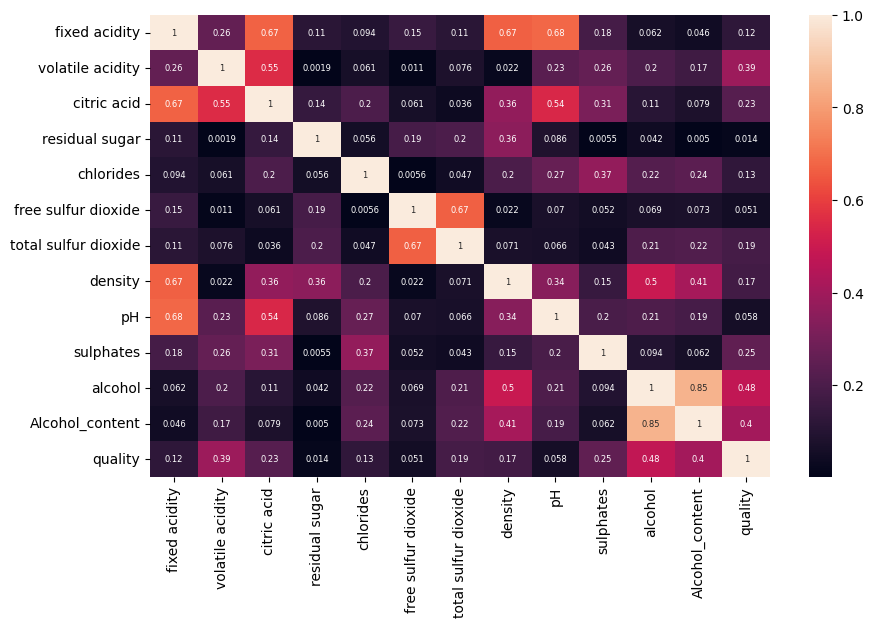

In [9]:
df_corr =  data.corr().abs()

plt.figure(figsize = (10,6))
sns.heatmap(df_corr,annot = True,annot_kws = {'size':6})
plt.show()

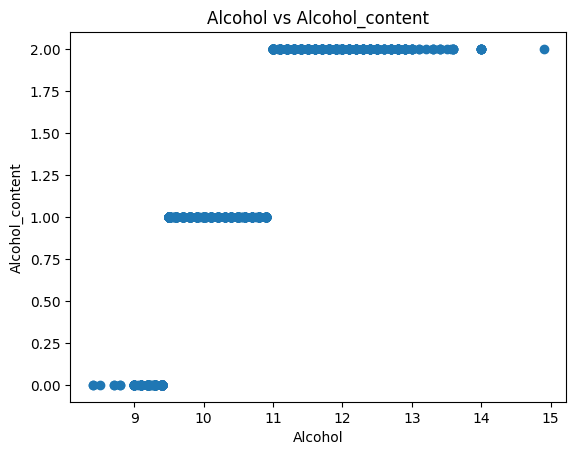

In [10]:
plt.scatter(data.alcohol,data.Alcohol_content)
plt.xlabel("Alcohol")
plt.ylabel("Alcohol_content")
plt.title("Alcohol vs Alcohol_content")
plt.show()

In [11]:
X = data.drop(columns = ['quality','Alcohol_content'])
y = data['quality']

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=41)

In [49]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print("=======Train Result===========")
        print(f'Accuracy Score=> {accuracy_score(y_train,y_pred) *100:.2f}%')
    elif train==False:
        pred = clf.predict(x_test)
        print("=======Test Result============")
        print(f'Accuracy Score=> {accuracy_score(y_test,pred) *100:.2f}%')
        
        print('\n \n Classification Report=>\n',classification_report(y_test,pred,digits=2))
        

In [55]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)


=======Train Result===========
Accuracy Score=> 100.00%
=======Test Result============
Accuracy Score=> 61.25%

 
 Classification Report=>
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.08      0.09      0.08        11
           5       0.67      0.68      0.68       157
           6       0.65      0.63      0.64       168
           7       0.57      0.53      0.55        57
           8       0.11      0.25      0.15         4

    accuracy                           0.61       400
   macro avg       0.35      0.36      0.35       400
weighted avg       0.62      0.61      0.62       400



In [53]:
y_pred = clf.predict(x_test)
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[  0,   0,   2,   0,   1,   0],
       [  1,   1,   6,   3,   0,   0],
       [  1,   8, 106,  37,   5,   0],
       [  0,   5,  35, 108,  18,   2],
       [  0,   1,   8,  15,  31,   2],
       [  0,   0,   1,   1,   1,   1]], dtype=int64)

In [57]:
pd.DataFrame(cfm,columns=['Q3','Q4','Q5','Q6','Q7','Q8'],index=['Q3','Q4','Q5','Q6','Q7','Q8'])

,Q3,Q4,Q5,Q6,Q7,Q8
Q3,0,0,2,0,1,0
Q4,1,1,6,3,0,0
Q5,1,8,106,37,5,0
Q6,0,5,35,108,18,2
Q7,0,1,8,15,31,2
Q8,0,0,1,1,1,1


In [61]:
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth':range(10,15),
    'min_samples_leaf':range(2,6),
    'min_samples_split':range(3,8),
    'max_leaf_nodes':range(5,15)
}

In [59]:
from sklearn.model_selection import GridSearchCV

In [62]:
gridsearch = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)

In [63]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 15),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [64]:
best_parm = gridsearch.best_params_
best_parm

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [76]:
clf = DecisionTreeClassifier( criterion= 'entropy',
 max_depth= 15,
 max_leaf_nodes= 9,
 min_samples_leaf= 2,
 min_samples_split= 3)

In [77]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=9,
                       min_samples_leaf=2, min_samples_split=3)

In [78]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)

=======Train Result===========
Accuracy Score=> 60.80%
=======Test Result============
Accuracy Score=> 60.75%

 
 Classification Report=>
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.64      0.69      0.66       157
           6       0.58      0.66      0.61       168
           7       0.63      0.42      0.51        57
           8       0.00      0.00      0.00         4

    accuracy                           0.61       400
   macro avg       0.31      0.29      0.30       400
weighted avg       0.58      0.61      0.59       400



In [68]:
y_pred = clf.predict(x_test)
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[  0,   0,   3,   0,   0,   0],
       [  0,   0,   8,   3,   0,   0],
       [  0,   0, 119,  36,   2,   0],
       [  0,   0,  85,  73,  10,   0],
       [  0,   0,   5,  28,  24,   0],
       [  0,   0,   0,   2,   2,   0]], dtype=int64)

In [69]:
pd.DataFrame(cfm,columns=['Q3','Q4','Q5','Q6','Q7','Q8'],index=['Q3','Q4','Q5','Q6','Q7','Q8'])

,Q3,Q4,Q5,Q6,Q7,Q8
Q3,0,0,3,0,0,0
Q4,0,0,8,3,0,0
Q5,0,0,119,36,2,0
Q6,0,0,85,73,10,0
Q7,0,0,5,28,24,0
Q8,0,0,0,2,2,0
